<a href="https://colab.research.google.com/github/Ilyshin-Roman/My_First_Test_Repo/blob/main/LB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Подключение нужных для работы моделей
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
# 2. Получение и чтение Excel файла из облака
#https://drive.google.com/file/d/1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00/view?usp=sharing
url = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00" 

# чтение данных, можно указать символ разделения столбцов (sep) и многие другие параметры, 
# index_col показывает, какой столбец нужно использовать как индекс строки в таблице
input_df = pd.read_csv(url, sep = ',', header = 0)
# вывод заголовка таблицы и первых пяти строк (сэмплов)
# вывод заголовка таблицы и первых пяти строк (сэмплов)
input_df.head()

,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


In [ ]:
# 3. Просмотр последних строк таблицы
input_df.tail()

,Wind_power_MW,Solar_power_kW,Consumption_MW
8755,128.719366,0.0,45.47
8756,129.583255,0.0,40.72
8757,130.447143,0.0,39.11
8758,132.606864,0.0,36.91
8759,134.766585,0.0,35.58


In [ ]:
# 4. Получение базовых статистических показателей
input_df.describe()

,Wind_power_MW,Solar_power_kW,Consumption_MW
count,8760.000000,8760.000000,8760.000000
mean,91.842674,1557.825929,31.154526
std,38.617121,2384.385076,8.008808
min,1.295833,0.000000,13.900000
25%,63.927739,0.000000,26.380000
50%,90.708278,0.000000,30.350000
75%,116.624929,2468.332800,36.610000
max,277.740109,8364.211200,56.290000


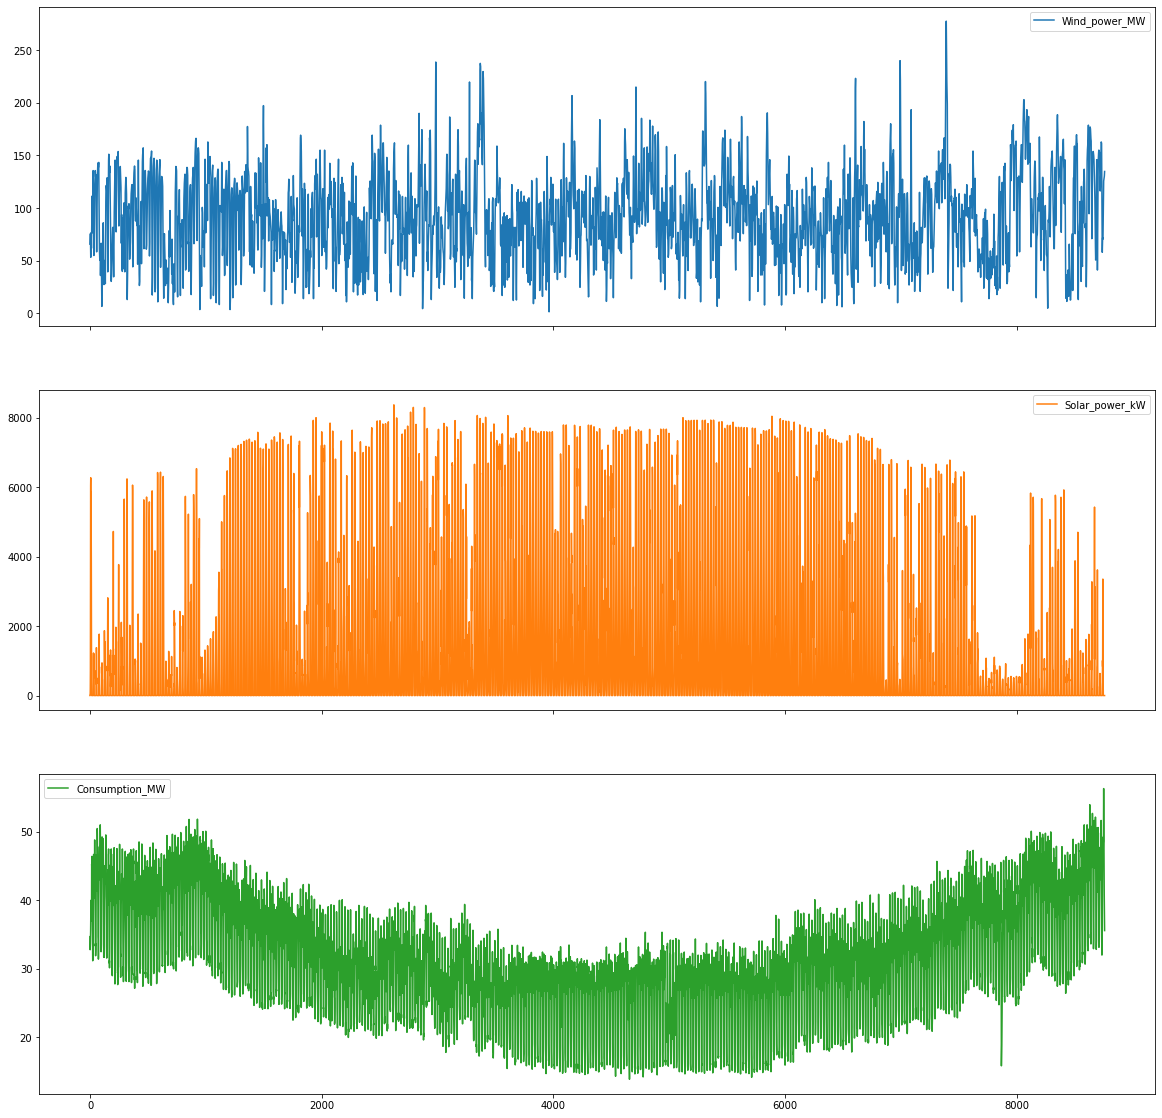

In [ ]:
# 5. Можно сразу построить графики
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

In [ ]:
# 7. Подробнее работа с табличными данными pandas будет в следующей работе. Сейчас нужно перевести все в матрицу
# Здесь в дело вступает другая очень популярная и мощная python-библиотека - NumPy

input_matrix = input_df.values # перевод таблицы в матрицу

print('размерность матрицы', input_matrix.shape)
print()

# можно посчитать среднее, минимальное, максимальное и прочие показатели

# цикл от 0 до числа столбцов
for i in range(0, len(input_df.columns)):
  # функция print выводит строку на экран
  # функция формат применяется к шаблону строки для подстановки в него нужных данных в нужном формате
  # запись input_matrix[: , i] означает что нужно взять все строки и i-й столбец из матрицы
  print("{: <12} mean = {:.2f}".format(input_df.columns[i], input_matrix[ :  , i].mean()))

размерность матрицы (8760, 3)

Wind_power_MW mean = 91.84
Solar_power_kW mean = 1557.83
Consumption_MW mean = 31.15


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


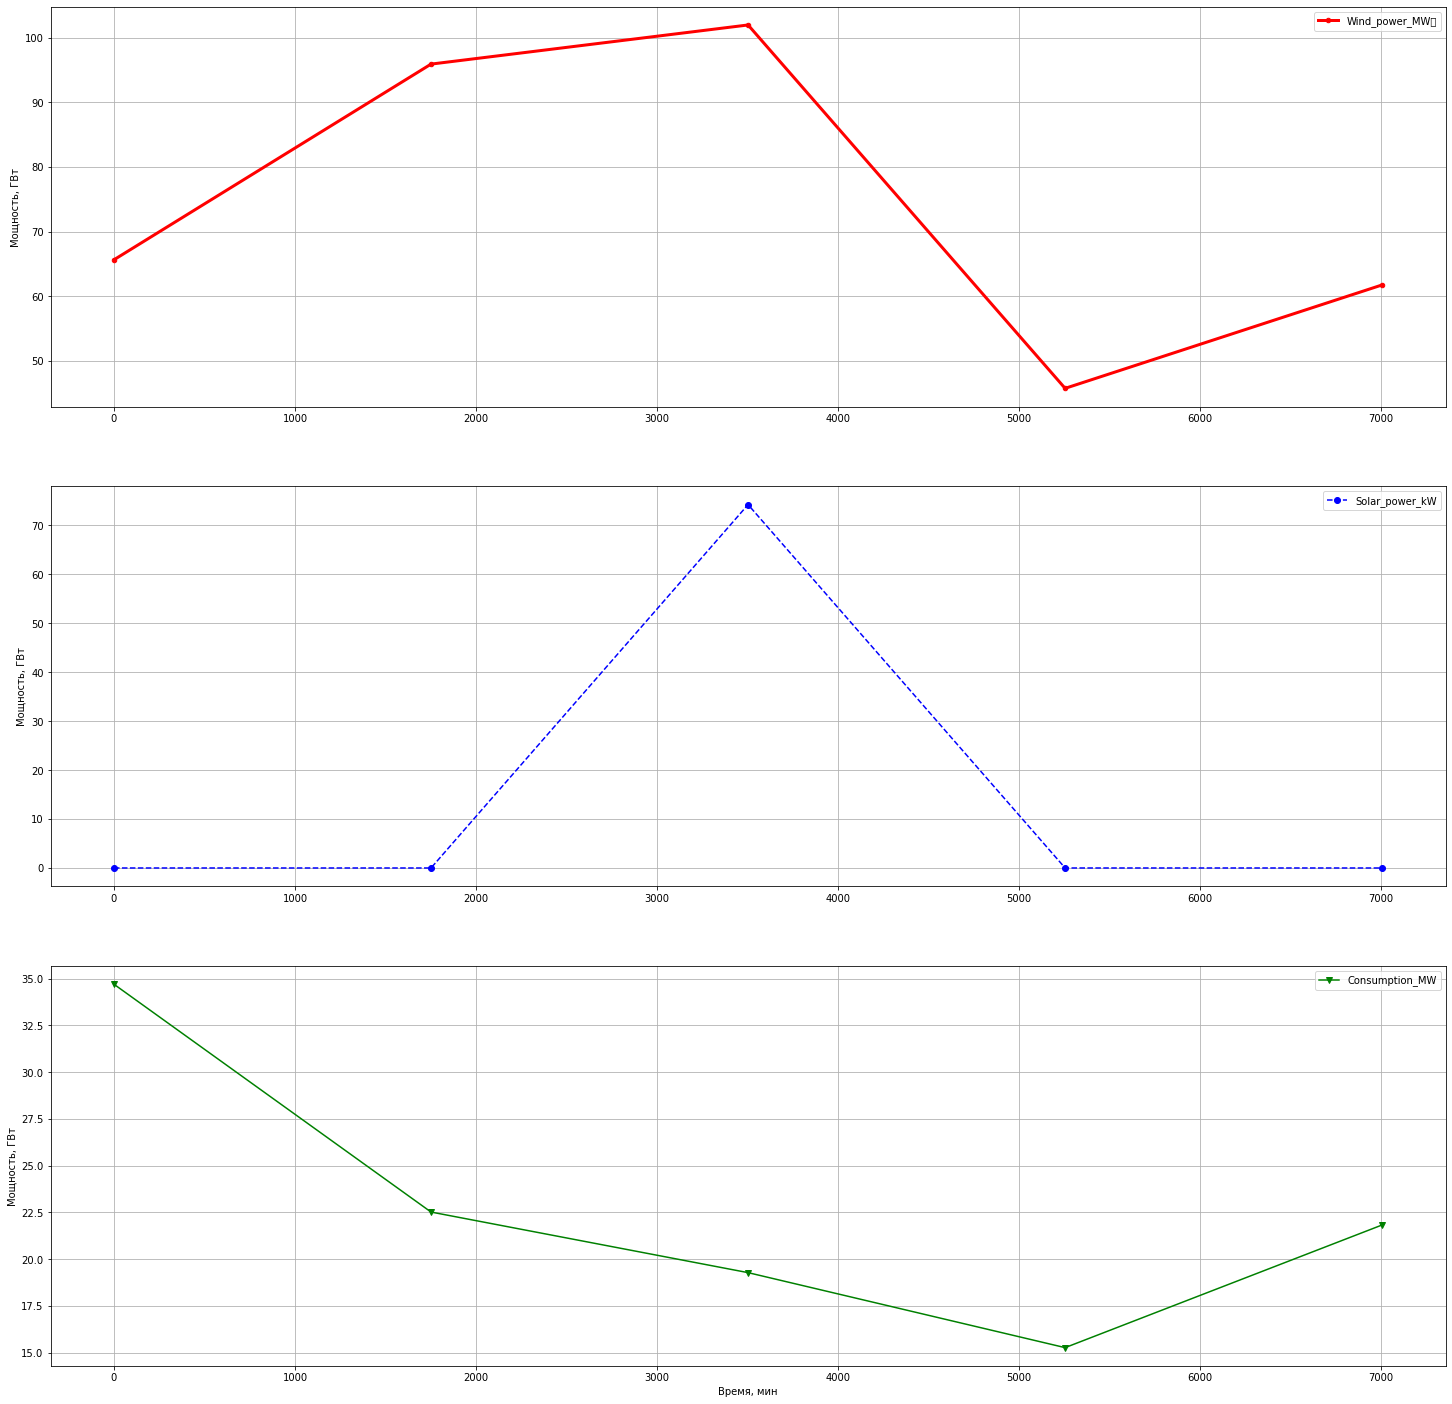

In [ ]:
# 9. То же самое, но лишь каждая пятая точка и все графики на отдельных плотах

# вначале создать объект для рисования на нем
fig, ax = plt.subplots(3, 1, figsize = (25, 25))

timestamps = range(0, input_matrix.shape[0], 1)

# зададим диапазон
begin = 0
end   = 8760
step = 1752

# легко указывать цвета, стиль линий, размеры и тип маркера
ax[0].plot(timestamps[begin : end : step], input_matrix[begin : end : step,0], 'red', marker = '.', linewidth = 3, markersize = 9)
ax[1].plot(timestamps[begin : end : step], input_matrix[begin : end : step,1], 'blue', linestyle = '--', marker = 'o')
ax[2].plot(timestamps[begin : end : step], input_matrix[begin : end : step,2], 'green', marker = 'v')


legend = ['Wind_power_MW	', 'Solar_power_kW', 'Consumption_MW']

# примеры "синтаксического сахара" Python (спросите пояснение у преподавателя)
for _ in zip(ax, legend):
  _[0].set_ylabel('Мощность, ГВт')
  _[0].legend([_[1]])
  _[0].grid(True)
# нет необходимости подписывать ось ординат у всех плотов, достаточно у последнего (последний - это -1) 
ax[-1].set_xlabel('Время, мин')

plt.show()

In [ ]:
generation_sum = input_matrix[begin : end : step,0]
print (generation_sum)

[ 65.65551564  95.89160837 101.9388269   45.78608328  61.768018  ]


In [ ]:
# 7. Для визуализации данных существует множество Python библиотек, обзор есть в https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N
# Рассмотрим одну из них - Bokeh https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(generation_sum)), generation_sum, line_width = 2)
p.scatter(np.arange(len(generation_sum)), generation_sum)
p.line(np.arange(len(generation_sum)), generation_sum, line_width = 2, color = 'red')
p.scatter(np.arange(len(generation_sum)), generation_sum, color = 'red')

show(p)

In [ ]:
generation_sum_2 = input_matrix[begin : end : step,1]
print (generation_sum_2)

[ 0.      0.     74.2656  0.      0.    ]


In [ ]:
# 7. Для визуализации данных существует множество Python библиотек, обзор есть в https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N
# Рассмотрим одну из них - Bokeh https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(generation_sum_2)), generation_sum_2, line_width = 2)
p.scatter(np.arange(len(generation_sum_2)), generation_sum_2)
p.line(np.arange(len(generation_sum_2)), generation_sum_2, line_width = 2, color = 'blue')
p.scatter(np.arange(len(generation_sum_2)), generation_sum_2, color = 'blue')

show(p)

In [ ]:
generation_sum_3 = input_matrix[begin : end : step,2]
print (generation_sum_3)

[34.7  22.52 19.28 15.27 21.83]


In [ ]:
# 7. Для визуализации данных существует множество Python библиотек, обзор есть в https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=QSMmdrrVLZ-N
# Рассмотрим одну из них - Bokeh https://docs.bokeh.org/en/latest/docs/user_guide/plotting.html

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

output_notebook()

p = figure(plot_width = 800, plot_height = 400)

p.line(np.arange(len(generation_sum_3)), generation_sum_3, line_width = 2)
p.scatter(np.arange(len(generation_sum_3)), generation_sum_3)
p.line(np.arange(len(generation_sum_3)), generation_sum_3, line_width = 2, color = 'green')
p.scatter(np.arange(len(generation_sum_3)), generation_sum_3, color = 'green')

show(p)

In [ ]:
# полученный прогноз можно сохранить в текстовый csv файл или в Excel формат
data_frame = pd.DataFrame(generation_sum)
data_frame.to_excel('generation_sum.xlsx', index = False, header = ['generation_sum'])
data_frame.to_csv('generation_sum.csv', index = False, header = ['generation_sum'])